In [1]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
import pandas as pd

PAT = pd.read_csv('PAT.txt', sep = "\n", engine='python')
SBP = pd.read_csv('SBP.txt', sep = "\n", engine='python')
DBP = pd.read_csv('DBP.txt', sep = "\n", engine='python')

#ABP = pd.concat([SBP, DBP], axis = 1)

In [ ]:
print(PAT)

In [2]:
train_index = int(0.7*len(PAT))

pat_train = PAT.iloc[:train_index]
pat_test = PAT.iloc[train_index:]
sbp_train = SBP.iloc[:train_index]
sbp_test = SBP.iloc[train_index:]
dbp_train = DBP.iloc[:train_index]
dbp_test = DBP.iloc[train_index:]

In [ ]:
print(PAT.loc[1])

In [ ]:
###first
pat_input = Input(shape=(1,), name='PAT')
x = layers.Dense(64, activation='relu')(pat_input)
x = layers.Dense(32, activation='relu')(x)

sbp_prediction  = layers.Dense(1, name='SBP')(x)
dbp_prediction = layers.Dense(1, name='DBP')(x)

model = models.Model(pat_input, [sbp_prediction, dbp_prediction])
model.summary()

In [ ]:
###second
pat_input = Input(shape=(1,), name='PAT')
sbp_prediction  = layers.Dense(1, activation='sigmoid' name='SBP')(pat_input)
dbp_prediction  = layers.Dense(1, activation='sigmoid', name='DBP')(pat_input)
model=models.Model(pat_input, [sbp_prediction, dbp_prediction])
model.summary()

In [3]:
###third

pat_input = Input(shape=(1,), dtype='float64', name='PAT')
x = layers.Embedding(output_dim=512, input_dim=2)(pat_input)
lstm_out = layers.LSTM(32)(x)
x = layers.Dense(64, activation='relu')(lstm_out)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
sbp_prediction  = layers.Dense(1, name='SBP')(x)
dbp_prediction  = layers.Dense(1, name='DBP')(x)

model = models.Model(pat_input, [sbp_prediction, dbp_prediction])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
PAT (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 512)       1024        PAT[0][0]                        
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 32)           69760       embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           2112        lstm[0][0]                       
______________________________________________________________________________________________

In [4]:
model.compile(optimizer='rmsprop', loss='mse')

In [5]:
hist = model.fit(pat_train, [sbp_train, dbp_train], epochs=50, batch_size=16)

Epoch 1/50
6023/6023 [==============================] - 25s 4ms/step - loss: 250.6880 - SBP_loss: 195.5430 - DBP_loss: 55.1456
Epoch 2/50
6023/6023 [==============================] - 25s 4ms/step - loss: 176.5105 - SBP_loss: 138.7396 - DBP_loss: 37.7706
Epoch 3/50
6023/6023 [==============================] - 36s 6ms/step - loss: 176.0102 - SBP_loss: 138.4009 - DBP_loss: 37.6093
Epoch 4/50
6023/6023 [==============================] - 46s 8ms/step - loss: 175.5535 - SBP_loss: 138.0735 - DBP_loss: 37.4803
Epoch 5/50
6023/6023 [==============================] - 24s 4ms/step - loss: 174.9138 - SBP_loss: 137.6010 - DBP_loss: 37.3130
Epoch 6/50
6023/6023 [==============================] - 28s 5ms/step - loss: 174.1309 - SBP_loss: 137.0049 - DBP_loss: 37.1259
Epoch 7/50
6023/6023 [==============================] - 41s 7ms/step - loss: 173.8487 - SBP_loss: 136.7858 - DBP_loss: 37.0629
Epoch 8/50
6023/6023 [==============================] - 28s 5ms/step - loss: 173.4272 - SBP_loss: 136.5226 - DB

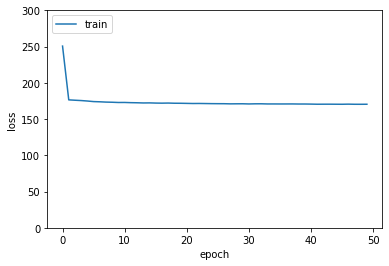

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 300)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
loss = model.evaluate(pat_test, [sbp_test, dbp_test], batch_size=16)
print('loss : ' + str(loss))

2582/2582 [==============================] - 5s 2ms/step - loss: 1370.9048 - SBP_loss: 1154.0148 - DBP_loss: 216.8884
loss : [1370.90478515625, 1154.0147705078125, 216.888427734375]


In [14]:
xhat_idx = 72
xhat = PAT.iloc[xhat_idx]
yhat = model.predict(xhat)

print('True : \n' + str(SBP.iloc[xhat_idx]) + '\n' + str(DBP.iloc[xhat_idx]))
print('Predict:\n' + 'SBP   ' + str(yhat[0][0]) + '\nDBP   ' + str(yhat[1][0]))

True : 
SBP    110.9377
Name: 72, dtype: float64
DBP    49.8787
Name: 72, dtype: float64
Predict:
SBP   [114.27921]
DBP   [63.382534]


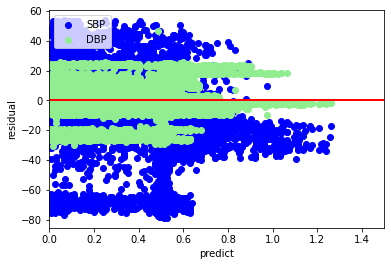

In [29]:
y_pred = model.predict(pat_test)
sbp_test_pred = y_pred[0]
dbp_test_pred = y_pred[1]
plt.scatter(pat_test, sbp_test_pred-sbp_test, c='blue', marker='o', label='SBP')
plt.scatter(pat_test, dbp_test_pred-dbp_test, c='lightgreen', marker='o', label='DBP')
plt.xlabel('predict')
plt.ylabel('residual')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([0,1.5])
plt.legend(loc=2)
plt.show()

In [ ]:
model.save('ECG_PPG_ABP.h5')